In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import log, pi
pd.set_option('display.max_rows', None)

plt.rcParams["figure.autolayout"] = True
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

#### Obliczenia stałych badanego układu

In [60]:
m = 7.164 #kg
k = 1389 #N/m
P = 0.0256 #kg*m
a = (k/m)**0.5 #rad/s
T = (2*pi)/a
print("a =",round(a,3), "1/s")
print("T =",round(T,3), "s")


a = 13.924 1/s
T = 0.451 s


## Badanie drgań swobodnych

In [36]:
df_swobodne = pd.read_csv("drgania_swobodne.csv")
df_swobodne["Amplituda"] = [abs(i) for i in df_swobodne["Amplituda"]]
df_swobodne["lnA"] = [round(log(abs(i)),4) for i in df_swobodne["Amplituda"]]
df_swobodne["t^2"] = [round(i**2,4) for i in df_swobodne["Czas"]]
df_swobodne["tlnA"] = [round(i*j,4) for i, j in zip(df_swobodne["Czas"], df_swobodne["lnA"])]

T = [2*(j-i) for i,j in zip(df_swobodne["Czas"][:-1], df_swobodne["Czas"][1:])]
T = round(sum(T)/len(T),4)
print("T =", T,"s")

czestosc_lambda = 2*pi/T
print("czestosc_lambda =", round(czestosc_lambda,4), "rad/s")

df_swobodne

T = 0.4536 s
czestosc_lambda = 13.8518 rad/s


,Czas,Amplituda,lnA,t^2,tlnA
0,0.867,36.9037,3.6083,0.7517,3.1284
1,1.093,30.3050,3.4113,1.1946,3.7286
2,1.320,22.6993,3.1223,1.7424,4.1214
3,1.547,16.3020,2.7913,2.3932,4.3181
4,1.773,9.2010,2.2193,3.1435,3.9348
5,2.001,4.1800,1.4303,4.0040,2.8620


#### Obliczenia sum i wartości innych wielkości

In [72]:
S1 = sum(df_swobodne["Czas"])
S2 = sum(df_swobodne["lnA"])
S11 = sum(df_swobodne["t^2"])
S12 = sum(df_swobodne["tlnA"])
print("Sumy =", [round(S1,4), S2, S11, S12])

D = len(df_swobodne)*S11-S1**2
print("D =", round(D,4))

lnA0 = (S11*S2-S1*S12)/D
print("lnA0 = ", round(lnA0,4))

h = (S1*S2-len(df_swobodne)*S12)/D
print("h =", round(h,4))

c = 2*h*m
print("c =", round(c,4))

ckr = 2*a*m
print("ckr =", round(ckr,4))

Sumy = [8.601, 16.5828, 13.2294, 22.0933]
D = 5.3992
lnA0 =  5.4371
h = 1.8649
c = 26.72
ckr = 199.5074


#### Wykres amplitudy dla drgań swobodnych

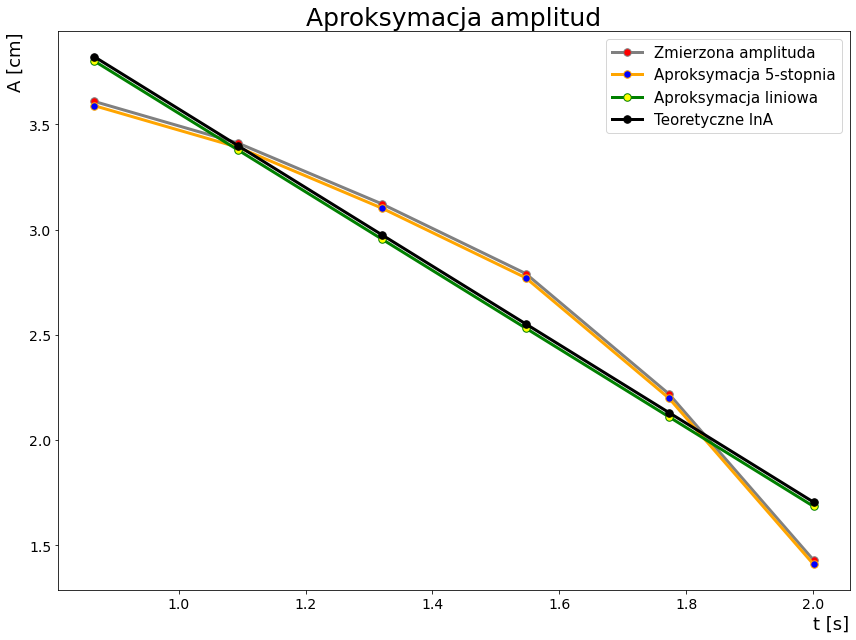

In [79]:
fig, ax = plt.subplots()
ax.clear()
x = df_swobodne["Czas"]
y = [round(log(i),3) for i in df_swobodne["Amplituda"]]
ax.plot(x, y, color='grey', linewidth=3, marker=".", markersize=15, markerfacecolor='red', label="Zmierzona amplituda")
plt.rcParams['figure.figsize'] = [12, 9]

wielomian = np.polyfit(x, y, 5)
y = [np.polyval(wielomian, i)-0.02 for i in x]
ax.plot(x, y, color='orange', linewidth=3, marker=".", markersize=15, markerfacecolor='blue', label="Aproksymacja 5-stopnia")

liniowa = np.polyfit(x, y, 1)
y = [np.polyval(liniowa, i) for i in x]
ax.plot(x, y, color='green', linewidth=3, marker=".", markersize=15, markerfacecolor='yellow', label="Aproksymacja liniowa")

y = [(lnA0 - h*t) for t in df_swobodne["Czas"]]
ax.plot(x, y, color='black', linewidth=3, marker=".", markersize=15, markerfacecolor='black', label="Teoretyczne lnA")

ax.set_title("Aproksymacja amplitud", {'size': 25})
ax.legend(loc=1, prop={'size': 15})

ax.set_xlabel("t [s]", {'size': 18}, loc='right')
ax.set_ylabel("A [cm]", {'size': 18}, loc='top')
plt.show()


##### Wzory aproksymacji

In [56]:
import sympy as sp
from sympy.abc import x
sp.init_printing()
wspolczynniki = [round(i,5) for i in wielomian]
sp.Poly(wspolczynniki,x).as_expr()

In [59]:
wspolczynniki = [round(i,5) for i in liniowa]
sp.Poly(wspolczynniki,x).as_expr()


## Badanie drgań wymuszonych

In [40]:
df_wymuszone = pd.read_csv("drgania_wymuszone.csv")
z = 6400
me = 0.0256
df_wymuszone['Amplituda'] = [round((x+y)/2,3) for x,y in zip(df_wymuszone['First'], df_wymuszone['Second'])]

df_wymuszone["n"] = [round(f*1000/z,3) for f in df_wymuszone["Czestotliwosc"]]
df_wymuszone["W"] = [round(2*pi*n,3) for n in df_wymuszone["n"]]
df_wymuszone["W/a"] = [round(W/a,3) for W in df_wymuszone["W"]]
df_wymuszone["W^2"] = [round(W**2,3) for W in df_wymuszone["W"]]
df_wymuszone["P0"] = [round(me*W,3) for W in df_wymuszone["W^2"]]
df_wymuszone["q"] = [round(P0/m,3) for P0 in df_wymuszone["P0"]]
df_wymuszone["A"] = [round(1000*q/abs(a**2-W**2),3) for q, W in zip(df_wymuszone["q"], df_wymuszone["W"])]
df_wymuszone["Ad"] = [round(1000*q/(((((a**2)-(W**2))**2)+4*(h**2)*(W**2))**0.5),3) for q, W in zip(df_wymuszone["q"], df_wymuszone["W"])]

#df_wymuszone.to_csv("wymuszone_obliczone.csv", index=False)

df_wymuszone.head(n=100)

,Czestotliwosc,Amplituda,First,Second,n,W,W/a,W^2,P0,q,A,Ad
0,2.0,0.001,0.000,0.002,0.312,1.960,0.141,3.842,0.098,0.014,0.074,0.074
1,4.0,0.008,0.006,0.010,0.625,3.927,0.282,15.421,0.395,0.055,0.308,0.307
2,6.0,0.025,0.010,0.040,0.938,5.894,0.423,34.739,0.889,0.124,0.779,0.772
3,8.0,0.801,0.103,1.500,1.250,7.854,0.564,61.685,1.579,0.220,1.664,1.625
4,10.0,2.527,1.454,3.600,1.562,9.814,0.705,96.315,2.466,0.344,3.526,3.301
5,12.0,6.247,0.031,12.463,1.875,11.781,0.846,138.792,3.553,0.496,9.003,7.038
6,13.0,11.128,1.926,20.331,2.031,12.761,0.916,162.843,4.169,0.582,18.748,10.242
7,13.5,14.835,0.249,29.421,2.109,13.251,0.952,175.589,4.495,0.627,34.268,11.897
8,13.6,15.563,1.903,29.223,2.125,13.352,0.959,178.276,4.564,0.637,40.807,12.206
9,13.7,16.797,17.113,16.481,2.141,13.452,0.966,180.956,4.632,0.647,50.039,12.487


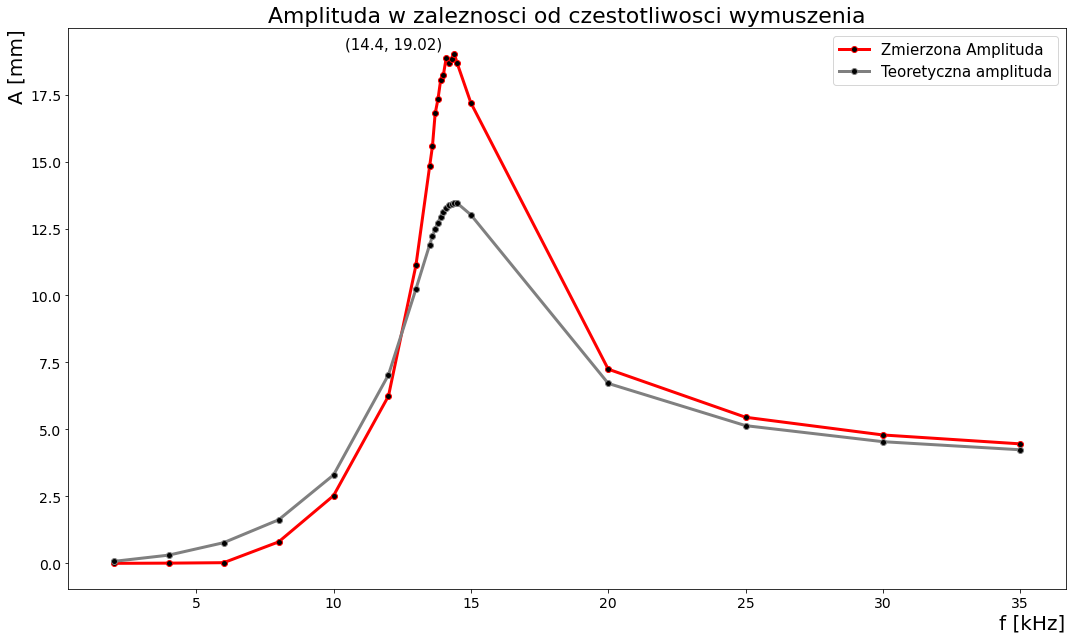

In [81]:
fig, ax = plt.subplots()
x = df_wymuszone["Czestotliwosc"]
y = df_wymuszone["Amplituda"]
ax.plot(x, y, color='r', linewidth=3, marker=".", markersize=12, markerfacecolor='black', label="Zmierzona Amplituda")
plt.rcParams['figure.figsize'] = [15, 9]
for i, j in zip(x, y):
    if j == df_wymuszone["Amplituda"].max():
        plt.text(i-4, j+0.2, f'({i}, {j})', {'size': 15})

y = df_wymuszone["Ad"]
ax.plot(x, y, color='gray', linewidth=3, marker=".", markersize=12, markerfacecolor='black', label="Teoretyczna amplituda")

ax.set_title("Amplituda w zaleznosci od czestotliwosci wymuszenia", {'size': 22})
ax.legend(loc=1, prop={'size': 15})

ax.set_xlabel("f [kHz]", {'size': 20}, loc='right')
ax.set_ylabel("A [mm]", {'size': 20}, loc='top')
plt.show()

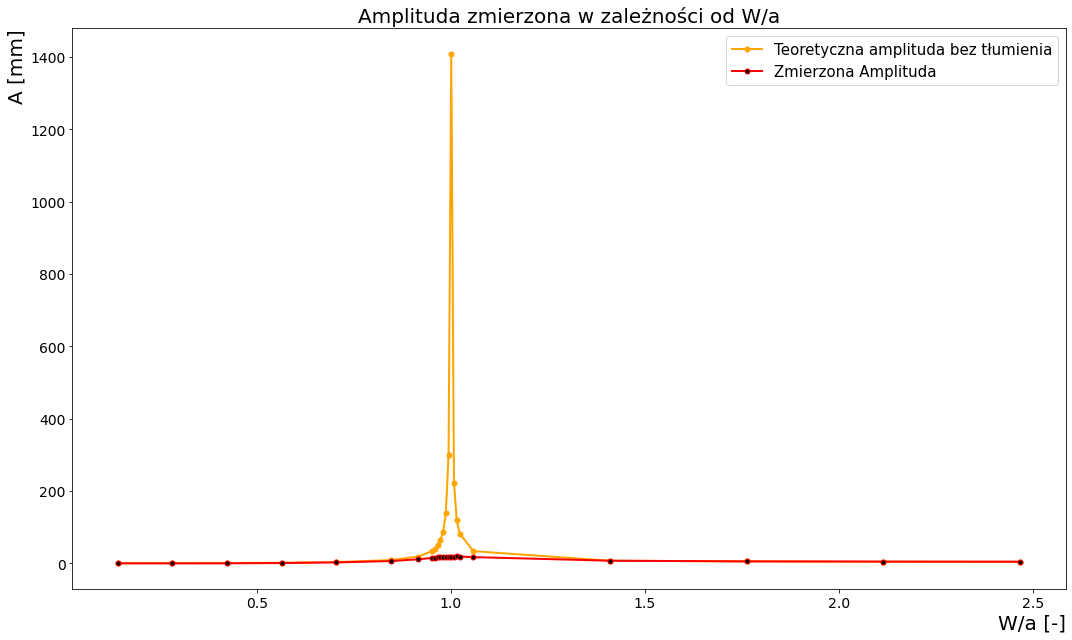

In [83]:
fig, ax = plt.subplots()
x = df_wymuszone["W/a"]
y = df_wymuszone["A"]
ax.plot(x, y, color='orange', linewidth=2, marker=".", markersize=10, markerfacecolor='orange', label="Teoretyczna amplituda bez tłumienia")

y = df_wymuszone["Amplituda"]
ax.plot(x, y, color='r', linewidth=2, marker=".", markersize=10, markerfacecolor='black', label="Zmierzona Amplituda")

ax.set_title("Amplituda zmierzona w zależności od W/a", {'size': 20})

ax.legend(loc=1, prop={'size': 15})
ax.set_xlabel("W/a [-]", {'size': 20}, loc='right')
ax.set_ylabel("A [mm]", {'size': 20}, loc='top')
plt.show()

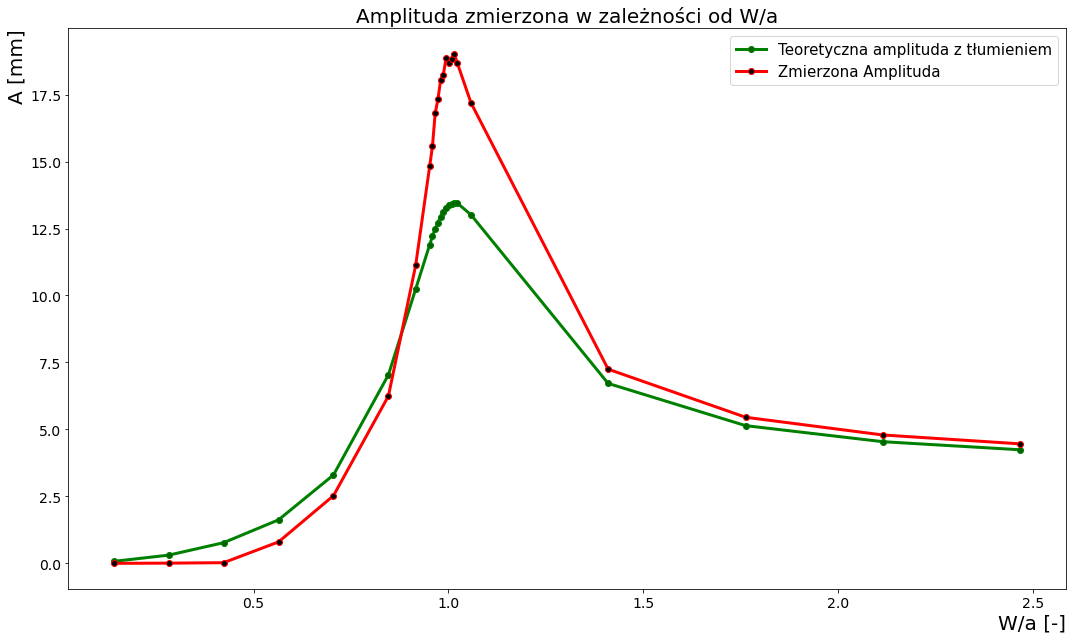

In [82]:
fig, ax = plt.subplots()
x = df_wymuszone["W/a"]
y = df_wymuszone["Ad"]
ax.plot(x, y, color='green', linewidth=3, marker=".", markersize=12, markerfacecolor='darkgreen', label="Teoretyczna amplituda z tłumieniem")

y = df_wymuszone["Amplituda"]
ax.plot(x, y, color='r', linewidth=3, marker=".", markersize=12, markerfacecolor='black', label="Zmierzona Amplituda")

ax.set_title("Amplituda zmierzona w zależności od W/a", {'size': 20})

ax.legend(loc=1, prop={'size': 15})
ax.set_xlabel("W/a [-]", {'size': 20}, loc='right')
ax.set_ylabel("A [mm]", {'size': 20}, loc='top')
plt.show()